In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy.random as npr
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
oned_ppca_ll_zs_true = pd.read_csv("oned_ppca_ll_zs_true.csv").iloc[:,1]
twod_ppca_ll_zs_true = pd.read_csv("twod_ppca_ll_zs_true.csv").iloc[:,1]

twod_ppca_ll_zs_true_logsigmalog15 = pd.read_csv("twod_ppca_ll_zs_true_logsigma0.693147180559945.csv").iloc[:,1]
twod_ppca_ll_zs_true_logsigmalog10 = pd.read_csv("twod_ppca_ll_zs_true_logsigma0.csv").iloc[:,1]
twod_ppca_ll_zs_true_logsigmalog5 = pd.read_csv("twod_ppca_ll_zs_true_logsigma-0.693147180559945.csv").iloc[:,1]
twod_ppca_ll_zs_true_logsigmalog2 = pd.read_csv("twod_ppca_ll_zs_true_logsigma-1.6094379124341.csv").iloc[:,1]
twod_ppca_ll_zs_true_logsigmalog1 = pd.read_csv("twod_ppca_ll_zs_true_logsigma-2.30258509299405.csv").iloc[:,1]

In [3]:
import numpy as np
def expandgrid(*arrs):
	arrs = tuple(reversed(arrs))
	lens =[i for i in  map(len, arrs)]
	dim = len(arrs)
	sz = 1
	for s in lens:
		sz *= s
	ans = []
	for i, arr in enumerate(arrs):
		slc = [1]*dim
		slc[i] = lens[i]
		arr2 = np.asarray(arr).reshape(slc)
		for j, sz in enumerate(lens):
			 if j != i:
				  arr2 = arr2.repeat(sz, axis=j)
		ans.append(arr2)
	out=np.transpose(np.vstack(map(np.ravel, tuple(ans))))
	return out

# alternatively: 

import itertools as it
[i for i in it.product(["a","b","c"],[1,2,3])]

[('a', 1),
 ('a', 2),
 ('a', 3),
 ('b', 1),
 ('b', 2),
 ('b', 3),
 ('c', 1),
 ('c', 2),
 ('c', 3)]

In [4]:
z = np.array([i for i in it.product(np.linspace(-2, 2, 50),np.linspace(-2, 2, 50))])

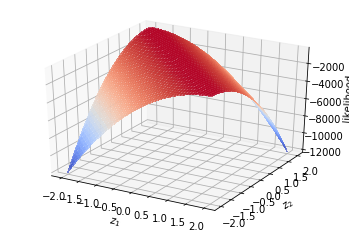

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(z[:,0].reshape([-1, 50]), 
                       z[:,1].reshape([-1, 50]), 
                       np.array(oned_ppca_ll_zs_true).reshape([-1, 50]), 
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.7, label="one-dimensional PPCA")
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('likelihood')
fig.savefig("ppca-oned.pdf")

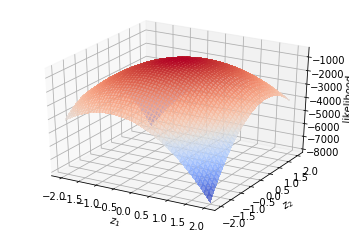

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
twod=ax.plot_surface(z[:,0].reshape([-1, 50]), 
                       z[:,1].reshape([-1, 50]), 
                       np.array(twod_ppca_ll_zs_true).reshape([-1, 50]), 
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.7, label="two-dimensional PPCA")
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('likelihood')
# fig.colorbar(twod, shrink=0.5, aspect=5)
fig.savefig("ppca-twod.pdf")

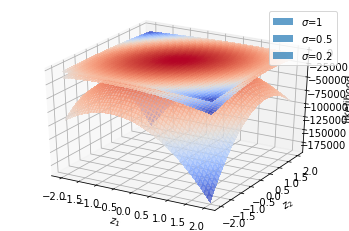

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
log10 = ax.plot_surface(z[:,0].reshape([-1, 50]), 
                       z[:,1].reshape([-1, 50]), 
                       np.array(twod_ppca_ll_zs_true_logsigmalog10).reshape([-1, 50]), 
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.7, label="$\sigma$=1")
log10._facecolors2d=log10._facecolors3d
log10._edgecolors2d=log10._edgecolors3d
log5 = ax.plot_surface(z[:,0].reshape([-1, 50]), 
                       z[:,1].reshape([-1, 50]), 
                       np.array(twod_ppca_ll_zs_true_logsigmalog5).reshape([-1, 50]), 
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.7, label="$\sigma$=0.5")
log5._facecolors2d=log5._facecolors3d
log5._edgecolors2d=log5._edgecolors3d
log2 = ax.plot_surface(z[:,0].reshape([-1, 50]), 
                       z[:,1].reshape([-1, 50]), 
                       np.array(twod_ppca_ll_zs_true_logsigmalog2).reshape([-1, 50]), 
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.7, label="$\sigma$=0.2")
log2._facecolors2d=log2._facecolors3d
log2._edgecolors2d=log2._edgecolors3d
# log1 = ax.plot_surface(z[:,0].reshape([-1, 50]), 
#                        z[:,1].reshape([-1, 50]), 
#                        np.array(twod_ppca_ll_zs_true_logsigmalog1).reshape([-1, 50]), 
#                        cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False, alpha=0.4, label="$sigma^2=0.1$")
# log1._facecolors2d=log1._facecolors3d
# log1._edgecolors2d=log1._edgecolors3d
# ax.plot_surface(z[:,0].reshape([-1, 50]), 
#                        z[:,1].reshape([-1, 50]), 
#                        np.array(twod_ppca_ll_zs_true_logsigman3).reshape([-1, 50]), 
#                        cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False, alpha=0.7, label="one-dimensional PPCA")
# ax.plot_surface(z[:,0].reshape([-1, 50]), 
#                        z[:,1].reshape([-1, 50]), 
#                        np.array(twod_ppca_ll_zs_true_logsigman4).reshape([-1, 50]), 
#                        cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False, alpha=0.7, label="one-dimensional PPCA")
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('likelihood')
ax.legend()
fig.savefig("ppca-varsigma.pdf")

In [8]:
oned_ppca_z_sample_hmc_all = pd.read_csv("oned_ppca_z_sample_hmc.csv")
twod_ppca_z_sample_hmc_all = pd.read_csv("twod_ppca_z_sample_hmc.csv")

In [20]:
k = npr.choice(50)
print(k)

12


In [21]:
oned_ppca_z_sample_hmc_sample = np.array(oned_ppca_z_sample_hmc_all.iloc[:,(1+k*2):(3+k*2)])

/Users/yixinwang/py3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


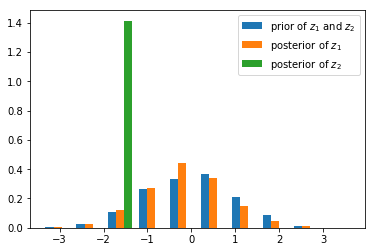

In [22]:
fig, ax = plt.subplots(1, 1)
# bins = np.linspace(-5, 5, 10)
prior_z_sample = npr.normal(0,1, size=1000)

bins = np.linspace(0, 1, 10)
ax.hist([prior_z_sample, 
         oned_ppca_z_sample_hmc_sample[:,0], 
        oned_ppca_z_sample_hmc_sample[:,1]],
#         bins = bins,
        normed=True,
        label=['prior of $z_1$ and $z_2$', 
              'posterior of $z_1$',
              'posterior of $z_2$'])
ax.legend()

fig.savefig("ppca-oned-posterior-hmc.pdf")

In [23]:
twod_ppca_z_sample_hmc_sample = np.array(twod_ppca_z_sample_hmc_all.iloc[:,(1+k*2):(3+k*2)])

/Users/yixinwang/py3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


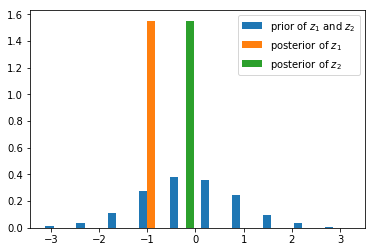

In [24]:
fig, ax = plt.subplots(1, 1)
# bins = np.linspace(-5, 5, 10)
prior_z_sample = npr.normal(0,1, size=1000)

bins = np.linspace(0, 1, 10)
ax.hist([prior_z_sample, 
         twod_ppca_z_sample_hmc_sample[:,0], 
        twod_ppca_z_sample_hmc_sample[:,1]],
#         bins = bins,
        normed=True,
        label=['prior of $z_1$ and $z_2$', 
              'posterior of $z_1$',
              'posterior of $z_2$'])
ax.legend()

fig.savefig("ppca-twod-posterior-hmc.pdf")

In [25]:
twod_ppca_z_sample_hmc_all = pd.read_csv("twod_ppca_z_sample_hmc.csv")

In [26]:
twod_ppca_z_sample_hmclogsigmalog15_all = pd.read_csv("twod_ppca_z_sample_hmclogsigma_0.693147180559945.csv")
twod_ppca_z_sample_hmclogsigmalog10_all = pd.read_csv("twod_ppca_z_sample_hmclogsigma_0.csv")
twod_ppca_z_sample_hmclogsigmalog5_all = pd.read_csv("twod_ppca_z_sample_hmclogsigma_-0.693147180559945.csv")
twod_ppca_z_sample_hmclogsigmalog2_all = pd.read_csv("twod_ppca_z_sample_hmclogsigma_-1.6094379124341.csv")
twod_ppca_z_sample_hmclogsigmalog1_all = pd.read_csv("twod_ppca_z_sample_hmclogsigma_-2.30258509299405.csv")

In [27]:
twod_ppca_z_sample_hmclogsigmalog15_sample = np.array(twod_ppca_z_sample_hmclogsigmalog15_all.iloc[:,(1+k*2):(3+k*2)])
twod_ppca_z_sample_hmclogsigmalog10_sample = np.array(twod_ppca_z_sample_hmclogsigmalog10_all.iloc[:,(1+k*2):(3+k*2)])
twod_ppca_z_sample_hmclogsigmalog5_sample = np.array(twod_ppca_z_sample_hmclogsigmalog5_all.iloc[:,(1+k*2):(3+k*2)])
twod_ppca_z_sample_hmclogsigmalog2_sample = np.array(twod_ppca_z_sample_hmclogsigmalog2_all.iloc[:,(1+k*2):(3+k*2)])
twod_ppca_z_sample_hmclogsigmalog1_sample = np.array(twod_ppca_z_sample_hmclogsigmalog1_all.iloc[:,(1+k*2):(3+k*2)])

In [28]:
twod_ppca_z_sample_varlogsigma_var1 = pd.DataFrame({"$\sigma$=1.5": twod_ppca_z_sample_hmclogsigmalog15_sample[:,0], \
                                       "$\sigma$=1.0": twod_ppca_z_sample_hmclogsigmalog10_sample[:,0], \
                                      "$\sigma$=0.5": twod_ppca_z_sample_hmclogsigmalog5_sample[:,0], \
                                      "$\sigma$=0.2": twod_ppca_z_sample_hmclogsigmalog2_sample[:,0], \
                                      "$\sigma$=0.1": twod_ppca_z_sample_hmclogsigmalog1_sample[:,0], \
                                      "prior": prior_z_sample})

twod_ppca_z_sample_varlogsigma_var2 = pd.DataFrame({"$\sigma$=1.5": twod_ppca_z_sample_hmclogsigmalog15_sample[:,1], \
                                       "$\sigma$=1.0": twod_ppca_z_sample_hmclogsigmalog10_sample[:,1], \
                                      "$\sigma$=0.5": twod_ppca_z_sample_hmclogsigmalog5_sample[:,1], \
                                      "$\sigma$=0.2": twod_ppca_z_sample_hmclogsigmalog2_sample[:,1], \
                                      "$\sigma$=0.1": twod_ppca_z_sample_hmclogsigmalog1_sample[:,1], \
                                      "prior": prior_z_sample})

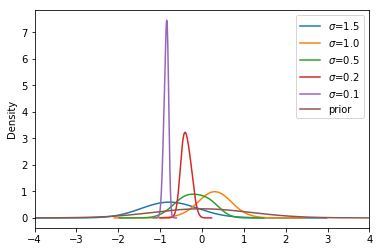

In [33]:
twod_ppca_z_sample_varlogsigma_var1.plot.kde(bw_method=0.6, xlim=(-4,4))
plt.savefig("ppca-twod-posterior-hmc-var-logsigma-var1.pdf")

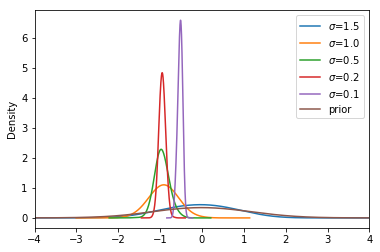

In [34]:
twod_ppca_z_sample_varlogsigma_var2.plot.kde(bw_method=0.6, xlim=(-4,4))
plt.savefig("ppca-twod-posterior-hmc-var-logsigma-var2.pdf")